## Datasets to stay away from
Practice hackathon need to impart business knowledge along with ML concepts. The dataset below is such example that doesn't do that! Modelling without understanding the data/business rules doesn't serve the purpose <br>

[Hackathon Practice](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/?utm_source=auto-email#ProblemStatement)

|Variable|	Description|
|---|---|
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or not|
|Item_Visibility|	The % of total display area of all products in a store allocated to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of city in which the store is located|
|Outlet_Type|	Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the outcome variable to be predicted.|


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
big_mark_df = pd.read_csv("train_v9rqX0R.csv")

print("head")
display(big_mark_df.head())

print("shape")
display(big_mark_df.shape)

print("dtypes")
display(big_mark_df.dtypes)

print("describe")
display(big_mark_df.describe())

print("isnull")
display(big_mark_df.isnull().sum())

head


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


shape


(8523, 12)

dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

describe


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


isnull


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

```Item_Weight``` and ```Outlet_Size``` have __NULL__

In [5]:
len(big_mark_df.groupby(["Item_Identifier", "Outlet_Identifier"]))

8523

The LOD(level of detail) is at ```item-outlet```<br>
Target Variable - ```Item_Outlet_Sales```

#### Suspicious...

This dataset isnt worth modelling and the reasons are below

###### 1
_Introduction_

The data set contains details about a product like Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP and store details like 	Outlet_Establishment_Year,	Outlet_Size,	Outlet_Location_Type,	Outlet_Type,	Item_Outlet_Sales. <br>
The expectation is that, for a product attribute and a store attribute - predict sales. <br> 
The basic idea would be to train the whole ```train_set``` on a linear model and test it, may be drop a few features (feature selection), try out XGBOOST because the dataset has no pattern as such, and a elasticnet or a regularized model would not be able to capture all the randomness in the data. <br>
Coupon is missing in the dataset, because we expect those to be present in every supermarket. 10% off on basket above 5000<br>
Promotions is missing in the dataset, because we expect those to be present in every supermarket. Rupees 22 off<br>
Coupon are the ones that are used while paying up, doesnt effect the MRP of the product, where are promotion is reduced MRP, as in the MRP is by 15%.<br>

###### 2
Target varibles is not reflective of true market behaviour

Below is the picture of count of target varible, having sales of a store-product equal to fourth decimal is not a realistic at all. <br>
``` import numpy as np
np.random.rand(10) ``` <br>
This would have yielded beter target varibles than just ```copy-paste``` target values multiple times

In [24]:
import numpy as np
np.random.rand(10)

array([0.09790277, 0.43693975, 0.44553308, 0.36189348, 0.31284065,
       0.71019102, 0.49116806, 0.25485723, 0.80745222, 0.93213843])

In [20]:
from collections import Counter

count_target = Counter(big_mark_df.Item_Outlet_Sales)

count_target.most_common(10)

[(958.752, 17),
 (1342.2528, 16),
 (703.0848, 15),
 (1845.5976, 15),
 (1230.3984, 14),
 (1278.336, 14),
 (1416.8224, 13),
 (1438.128, 12),
 (759.012, 12),
 (539.298, 12)]

In [39]:
big_mark_df[((big_mark_df["Item_Outlet_Sales"] == 958.752) )]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
322,DRD13,15.000,Low Fat,0.049357,Soft Drinks,62.6168,OUT017,2007,NaN,Tier 2,Supermarket Type1,958.752
560,DRH13,8.575,Low Fat,0.023983,Soft Drinks,106.3280,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.752
870,FDT50,6.750,Regular,0.108149,Dairy,95.6752,OUT013,1987,High,Tier 3,Supermarket Type1,958.752
1048,FDE22,9.695,Low Fat,0.029633,Snack Foods,159.6920,OUT045,2002,NaN,Tier 2,Supermarket Type1,958.752
1375,FDP04,15.350,Low Fat,0.013841,Frozen Foods,65.2168,OUT045,2002,NaN,Tier 2,Supermarket Type1,958.752
1420,FDC56,7.720,Low Fat,0.121521,Fruits and Vegetables,118.2440,OUT046,1997,Small,Tier 1,Supermarket Type1,958.752
1894,FDP04,15.350,Low Fat,0.013834,Frozen Foods,62.7168,OUT049,1999,Medium,Tier 1,Supermarket Type1,958.752
1936,FDD59,10.500,Regular,0.066555,Starchy Foods,80.8960,OUT017,2007,NaN,Tier 2,Supermarket Type1,958.752
3899,FDX04,19.600,Regular,0.041741,Frozen Foods,49.2376,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.752
4126,FDC59,NaN,Regular,0.054364,Starchy Foods,63.8168,OUT027,1985,Medium,Tier 3,Supermarket Type3,958.752


1a1

In [48]:
big_mark_df[(big_mark_df["Item_Identifier"].isin(["FDX04", "FDP04"])) & (big_mark_df["Outlet_Identifier"].isin(["OUT018", "OUT049"]))]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1894,FDP04,15.35,Low Fat,0.013834,Frozen Foods,62.7168,OUT049,1999,Medium,Tier 1,Supermarket Type1,958.7520
2592,FDP04,15.35,Low Fat,0.013869,Frozen Foods,62.5168,OUT018,2009,Medium,Tier 3,Supermarket Type2,447.4176
3443,FDX04,19.60,Regular,0.041636,Frozen Foods,47.3376,OUT049,1999,Medium,Tier 1,Supermarket Type1,1150.5024
3899,FDX04,19.60,Regular,0.041741,Frozen Foods,49.2376,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.7520


In [53]:
big_mark_df.groupby(["Outlet_Location_Type"]).agg({"Item_Outlet_Sales" : "sum"}).reset_index()

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


In [55]:
Counter(big_mark_df["Outlet_Location_Type"])

Counter({'Tier 2': 2785, 'Tier 3': 3350, 'Tier 1': 2388})

FDX04-OUT018, FDP04-OUT049, the product is sold in two stores, but the Target Varibles is counter intuitive. <br>
Teir 3 stores has the highest sales, but these two products the tier-3 has low sales, this obviously could be an odd case but the question still stays. <br>
FDX04-OUT018 is another case where the sales is low, but it is a Tier-3 store, so the sales should be higher than OUT049 store. So the question arises, has  Outlet_Location_Type effect has been counter acted by MRP. Only an EDA can give an answer <br>

In [26]:
import re
big_mark_df["Item_Identifier"] = big_mark_df["Item_Identifier"].apply(lambda x : re.findall(r"\b[A-Z0-9]{2,}\b", x)[0])
big_mark_df["Outlet_Identifier"] = big_mark_df["Outlet_Identifier"].apply(lambda x : re.findall(r"\b[A-Z0-9]{2,}\b", x)[0])

display(big_mark_df.dtypes)
                                                                      
display(big_mark_df.head())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Each product is different and for each product, the sales throught outlets will be a function of the store attribute as well. But in this dataset, each store-product has one row. Thats all. The supermarkets are bound to have day level data at store-product level, and them model differently each product. Or at a higher level ```Item_Type``` in this case. The concept of seasonality, trend, how do events effect the sales, all this is not captured in the dataset. Hence practice hackathon is basically of no practical use in real world. 

In [28]:
item_1   = "FDA15"
outlet_1 = "OUT049"

big_mark_df[((big_mark_df["Item_Identifier"] == item_1) & (big_mark_df["Outlet_Identifier"] == outlet_1))]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5413,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


The concept of price elasticity is nearly non-existance 

In [34]:
big_mark_df[(big_mark_df["Item_Identifier"] == "FDA15")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
831,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
2643,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
4874,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
5413,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
6696,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
7543,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392


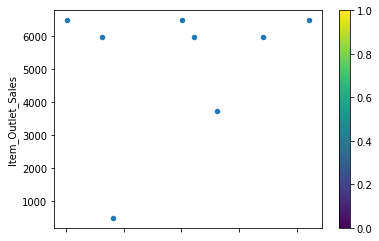

In [33]:
big_mark_df[(big_mark_df["Item_Identifier"] == "FDA15")].plot.scatter( x = "Item_MRP",
                          y = "Item_Outlet_Sales", 
                        colormap='viridis')

In [37]:
big_mark_df[(big_mark_df["Item_Identifier"] == "DRF37") ][["Item_Identifier", "Item_MRP", "Item_Outlet_Sales"]]

,Item_Identifier,Item_MRP,Item_Outlet_Sales
1463,DRF37,263.591,788.973
5011,DRF37,261.191,3155.892
5210,DRF37,261.591,3418.883
7459,DRF37,263.391,6311.784
7478,DRF37,261.291,788.973
8506,DRF37,263.191,3944.865


Consider this `Soft Drinks` product with prices between 261-263, the catch here is at higher price it is selling more than at lower priced, which does not happen. This dataset is a mock one, but fundamental ideas should be existant and valid.

__Stay Away__ from hackathons that add no value, like the ones above. But slicing/dicing the data and understanding the effect of one variable on other, the corr of the varibles, all these can be played with, but not modelling exercise. So EDA __yes__ modelling a big __no__ as the data lacks business heuristics and modelling without an clear understanding of business rules does not help business accure profits